<a href="https://colab.research.google.com/github/nicolas1428/skills-introduction-to-github/blob/main/Student_MLE_MiniProject_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [3]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [4]:
!pip install scikeras

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [6]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download the dataset and load it into a pandas DataFrame

In [7]:
# Define column names based on UCI Adult Dataset documentation.
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Load the dataset from the specified path.
# - `names=column_names` assigns meaningful column names since the dataset lacks a header.
# - `skipinitialspace=True` removes leading spaces from values, ensuring clean data.
df = pd.read_csv(DATA_PATH, names=column_names, skipinitialspace=True)



In [8]:
# Display the first few rows of the DataFrame

In [9]:
# Display the first few rows to verify successful loading.
print(df.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [10]:
# Do some exploratory analysis. How many rows/columns are there? How are NULL
# values represented? What's the percentrage of positive cases in the dataset?

In [11]:
# Get the shape of the dataset
rows, columns = df.shape

# Print the number of rows and columns
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

# Iterate over all columns to analyze their unique values and data types
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")  # Display the first 10 unique values in each column
    print(f"Data type: {df[col].dtype}")      # Show the data type of the column
    print("  ")  # Add spacing for better readability

#After analizing the data, missing values in categorical columns are represented by question marks

# Get the number of positive cases in the 'income' column
# Assuming 'income' is a categorical column with two values (e.g., '<=50K' and '>50K'),
# df['income'].value_counts() returns the count of each unique value.
# The `[1]` index assumes that the second value in the frequency count corresponds to positive cases.
print(f"Number of positive cases: {df['income'].value_counts()[1]}")




Number of rows: 32561
Number of columns: 15
age: [39 50 38 53 28 37 49 52 31 42]
Data type: int64
  
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Data type: object
  
fnlwgt: [ 77516  83311 215646 234721 338409 284582 160187 209642  45781 159449]
Data type: int64
  
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate']
Data type: object
  
education_num: [13  9  7 14  5 10 12 11  4 16]
Data type: int64
  
marital_status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Data type: object
  
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct']
Data type: object
  
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-rela

<ipython-input-11-24c7b6121818>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of positive cases: {df['income'].value_counts()[1]}")


In [12]:
# Find all NULL values and drop them

In [13]:
# Replace "?" with NaN for better handling of missing values
df.replace("?", pd.NA, inplace=True)

# Drop rows where any column has NaN values
df.dropna(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [14]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.

In [15]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'income' column
df["income"] = encoder.fit_transform(df["income"])

1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [16]:
# Split dataset into training and test sets

In [17]:
# Separate features (X) and target variable (y)
X = df.drop('income', axis=1)  # Features (everything except 'income')
y = df['income']  # Target variable ('income')

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [18]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the majority class.

In [19]:
# Find the most frequent class in the training labels
majority_class = y_train.value_counts().idxmax()

# Create an array of predictions (all assigned to the majority class)
y_pred_majority = np.full(shape=y_test.shape, fill_value=majority_class)

# Compute the AUC score
majority_auc_score = roc_auc_score(y_test, y_pred_majority)

Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [20]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the
# categorical variables in workclass, education, marital-status, occupation,
# relationship, 'race', sex, and native-country. #Also, apply MinMaxScaler to
# the remaining continuous features.

In [21]:
# Define categorical and continuous columns
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation',
                       'relationship', 'race', 'sex', 'native_country']
continuous_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain',
                      'capital_loss', 'hours_per_week']

# Create a ColumnTransformer to preprocess data
column_transformer = ColumnTransformer(
    transformers=[
        # Apply One-Hot Encoding to categorical columns (ignores unknown categories)
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),

        # Apply MinMax Scaling to continuous columns (scales values between 0 and 1)
        ('cont', MinMaxScaler(), continuous_columns)
    ],
    remainder='passthrough'  # Keep any other columns unchanged
)

In [22]:
# How many columns will the dataframe have after these columns transformations are applied?

In [23]:
# Fit and transform the dataset
X_transformed = column_transformer.fit_transform(X)

# Get feature names after transformation
encoded_cat_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_columns)
new_column_names = list(encoded_cat_columns) + continuous_columns  # Combine encoded and scaled columns

# Change X_transformed from a sparse matrix (OneHotEncoder format) to an array
X_transformed = X_transformed.toarray()

# Convert the transformed NumPy array back to a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=new_column_names)

# Get the shape of the transformed DataFrame to count the totals of new columns
new_total_columns = X_transformed_df.shape[1]
print(f"Total columns after transformations: {new_total_columns}")

Total columns after transformations: 104


Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [24]:
# Define the Keras model

In [25]:
# Create a Sequential model
model = Sequential()

# First hidden layer with 64 neurons, ReLU activation, and input size
model.add(Dense(64, activation='relu', input_dim=new_total_columns))

# Second hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with 1 neuron and sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with adam optimizer, binary cross entropy loss and AUC metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Create a Keras classifier

In [27]:
# Wrap the Keras model to work with Scikit-Learn
keras_model = KerasClassifier(model, epochs=10, batch_size=32, verbose=1)

In [28]:
# Create the scikit-learn pipeline

In [29]:
# Create a pipeline using first the column transformer and the creating the model
pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('keras_model', keras_model)
])

In [30]:
# Fit the pipeline on the training data

In [31]:
pipeline.fit(X_train, y_train)

Epoch 1/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - AUC: 0.8115 - loss: 0.4259
Epoch 2/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8931 - loss: 0.3453
Epoch 3/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9007 - loss: 0.3327
Epoch 4/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9053 - loss: 0.3301
Epoch 5/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9083 - loss: 0.3183
Epoch 6/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9104 - loss: 0.3172
Epoch 7/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9142 - loss: 0.3098
Epoch 8/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9156 - loss: 0.3061
Epoch 9/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9144 - loss: 0.3095
Epoch 10/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9212 - loss: 0.2991


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country']),
                                                 ('cont', MinMaxScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week'])])),
                ('keras_model',
                 KerasClassifier(batch_size=32, epochs=10, model=<Sequential name=sequential, built=True>))])

In [32]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random?

In [33]:
# Get predicted probabilities for each class
probabilities = pipeline.predict_proba(X_test)

# Compute the AUC score for the Keras model using the probability of the positive class (>50K)
keras_auc_score = roc_auc_score(y_test, probabilities[:, 1])

# Compare with the baseline model's AUC score (majority class predictor)
print(f"Keras AUC Score: {keras_auc_score}")
print(f"Random AUC Score: {majority_auc_score}")

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Keras AUC Score: 0.9077086590058334
Random AUC Score: 0.5


In [34]:
# Generate an ROC curve for your model.

In [37]:
probabilities

array([[0.7995027 , 0.20049733],
       [0.95442486, 0.04557516],
       [0.755309  , 0.244691  ],
       ...,
       [0.26057965, 0.73942035],
       [0.7375238 , 0.26247618],
       [0.6641892 , 0.33581075]], dtype=float32)

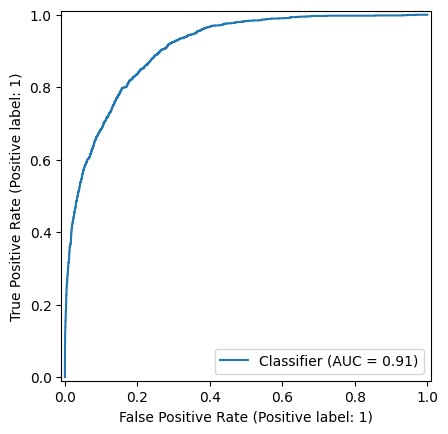

In [38]:
RocCurveDisplay.from_predictions(y_test, probabilities[:,1])